# A Statistical Analysis of the Boston House Prices Dataset

The purpose of this notebook is to introduce the reader to the well known data set of Boston House Prices.
The dataset was originally published by **Harrison, D. and Rubinfeld, D.L.** *`Hedonic prices and the demand for clean air'*, J. Environ. Economics & Management, vol.5, 81-102, 1978.

It contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms.

**Reference:** https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

There are a number of versions of this dataset available, however for the purposes of this assignment, I will use the dataset that is included in the scikit-learn package for Python.

**Python packages used in the analysis** <br>
Below, I import the packages necessary to carry out all of the work that is coded within this notebook

In [1]:
# To import the boston dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston

# for dataframe creation and manipulation
import pandas as pd

# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# for mathematical tools and plotting
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# inferential stats
import scipy.stats as ss

# prediction
import keras as kr
import sklearn as sk
import sklearn.preprocessing as pre
import sklearn.decomposition as dec
import sklearn.model_selection as mod


Using TensorFlow backend.


## Document Objectives

The document is split into a number of distinct sections, aimed at providing a comprehensive statistical analysis of the data contained in the Boston House Price datset.

***
### 1. Descriptive Statistics
First, we will take a look at the data using some descriptive statistics, as well as attempting to identify what, if any relationships exist between the included variables.

***
### 2. Inferential Statistics
We will then take a specific look at the price of houses divided into two distinct groups; those situated along the Charles River, and those that are not. We will attempt to infer from the data, whether there is a statistically significant difference between the values of houses in the two categories.

***
### 3. Prediction

We will use the keras package to create a neural network that can predict the median house price, based on the other variables in the dataset.
***

## Part 1: Describing the Dataset

In [2]:
# load the dataset
boston = load_boston()

# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# identify the various contents of the dataset
# data: this is the actual recorded data
# target: this is the median house price per area. It is usually the variable we are attempting to predict, 
# and so is not included in the data
# feature_names: the names of the attributes contained in the data
# DESCR: is a text description of the data, including definition of the attributes, no. of instances and various other information
# filename: the full path file name of the dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.filename

'/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

***
'MEDV', the **target** variable, is stored separately to the rest of the data. So we will store the data as a Pandas dataframe, and add the target variable to df.
***

In [6]:
# create a dataframe, with column headers equal to the attribute names
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

In [7]:
# add the target variable to the dataframe as 'MEDV'
df["MEDV"] = boston.target

In [8]:
# df.shape will show that the dataset contains 13 columns (or attributes), with 506 rows.
# One of which is the header row, therefore 505 records in the dataset 
df.shape

(506, 14)

In [9]:
# Display the first 5 rows in the dataset, to get an idea of what is contained
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# There are no missing values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

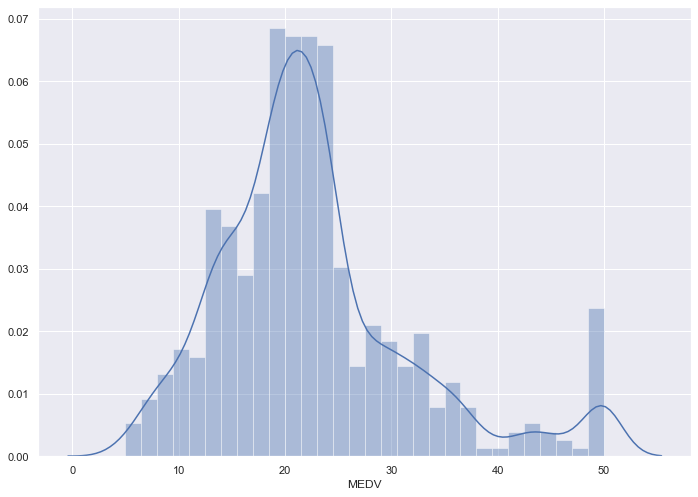

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

The above shows that the Median House Price values per area are roughly normally distributed, with the exception of a number of values set at 50.0, which suggests that values may be capped at $50k for the dataset.

In [12]:
df.shape

(506, 14)

Now we will look at some basic descriptive statistics for the remaining instances

In [13]:
pd.set_option('display.max_rows', None)
stats = df.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [14]:
pd.set_option('display.max_rows', 10)

We can review the descriptions of the attributes to see if there are any interesting relationships to be identified.<br>
For example, one might expect that there would be some positive correlation between CRIM and LSTAT attributes, where the crime rate rises as the percentage of lower status residents increases.

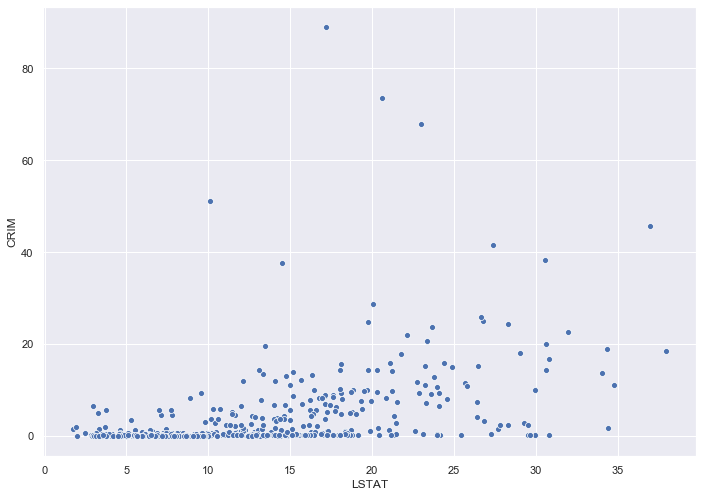

In [15]:
sns.scatterplot(x = df['LSTAT'] , y = df['CRIM'])

and we can see the above scatterplot shows a moderate positive trend.
<br><br>
Similarly, we might assume that a lower pupil-teacher ratio might suggest a more affluent neighbourhood and therefore a lower crime rate, so we might also expect to see a positive correlation between PTRATIO and CRIM. However this is not as obvious.

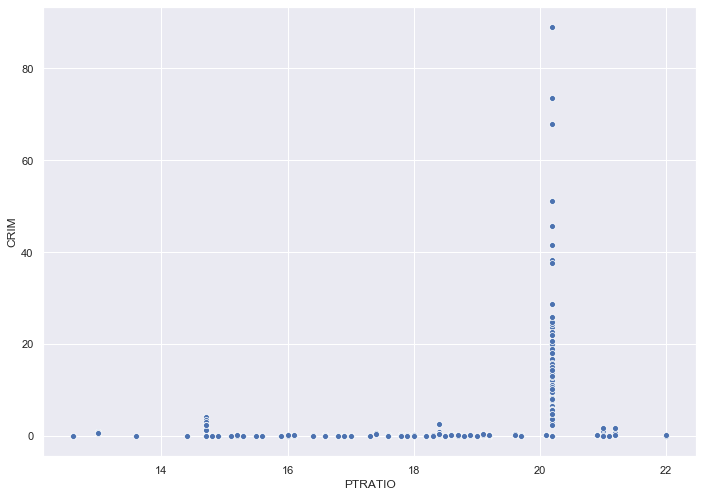

In [16]:
sns.scatterplot(x = df['PTRATIO'] , y = df['CRIM'])

Since MEDV, or the Median House Price Value per town will be the target attribute for our prediction later, there are a number of attributes that we could assume might have a great impact on MEDV:
<br>
- CRIM
- ZN
- RM
- RAD
- DIS
- PTRATIO
- LSTAT

The below heatmap indicates the strength of correlation between each pair of attributes

### Note
The Correlation coefficient is measured on a scale of [-1, 1]
- -1 being a perfect negative correlation
- +1 being a perfect positive correlation
- 0 being no correlation whatsoever

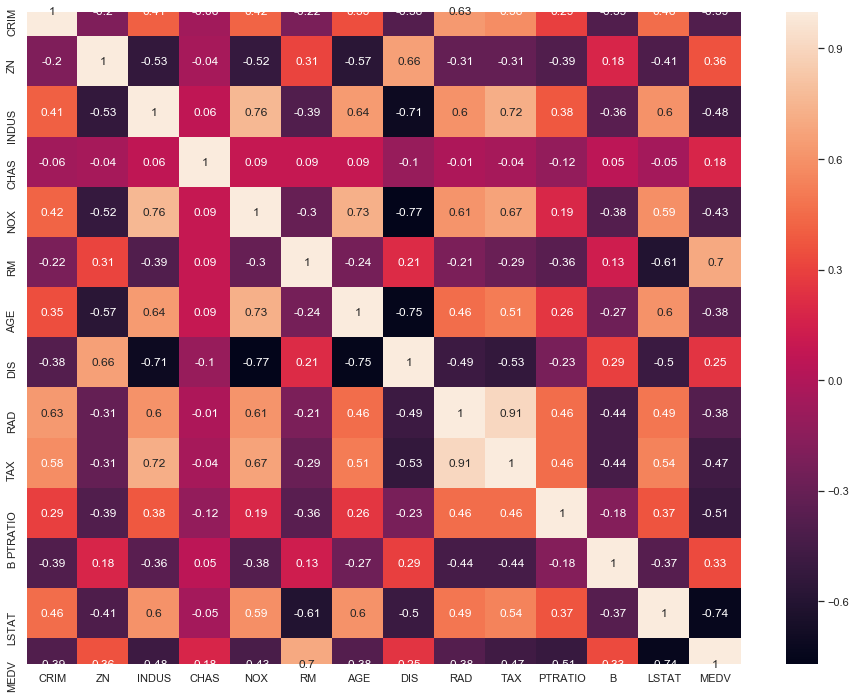

In [17]:
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(16, 12))
sns.heatmap(data=correlation_matrix, annot=True)

We can also print the correlation matrix to show us the correlation coefficients for each pair of variables.
<br>
Here, we can see that the correlation we discussed earlier (CRIM/LSTAT and CRIM/PTRATIO) are 0.46 and 0.29, or moderate positive and weak positive, respectively. This did reflect our scatterplots and the assumptions we made based on them.

In [18]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47
PTRATIO,0.29,-0.39,0.38,-0.12,0.19,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37,-0.51
B,-0.39,0.18,-0.36,0.05,-0.38,0.13,-0.27,0.29,-0.44,-0.44,-0.18,1.00,-0.37,0.33
LSTAT,0.46,-0.41,0.60,-0.05,0.59,-0.61,0.60,-0.50,0.49,0.54,0.37,-0.37,1.00,-0.74


If we review the R values for the MEDV column, we can see the strongest correlations are in fact:<br>
- RM: 0.70
- PTRATIO: -0.51
- LSTAT: -0.74

There are a number of other attributes with lower moderate correlations, but these three seem to stand out as the predominant factors in calculating the Median Property Values.

***
## Part 2: Inference WRT MEDV based on CHAS

We will now look at the dataset to determine whether there is a statistically significant difference between the Median Property Values of houses in areas that sit along the Charles River, and those that do not.

The first thing we therefore must do, is to split the dataset into two samples.
- first sample will contain records where CHAS = 1 (i.e. area has Charles River as a boundary)
- second sample will contain records where CHAS = 0 (i.e. area does not have Charles River as a boundary)

In [19]:
df_chas = df[df.CHAS == 1]
df_notChas = df[df.CHAS == 0]

We can see below that the size of both samples is vastly different.

In [20]:
df_chas.shape

(35, 14)

In [21]:
df_notChas.shape

(471, 14)

### Hypothesis Testing
**Reference:** https://towardsdatascience.com/hypothesis-testing-using-t-test-inferential-statistics-part3-6fb43683bc32<br/><br/>
Firstly we need to set our hypotheses.

The hypothesis we want to test for, our **null** hypothesis ($H_{0}$), will be that the mean house price in areas bordering the river is the same as the mean house price in areas that do not border the river.

In other words $H_{0}$: $m_{chas}$ = $m_{notChas}$

We will carry out a two-sided hypothesis test, which means that we will reject $H_{0}$, if the mean values are not equal to eachother. We are not concerned with whether the river values are specifically greater than, or less than the non-River values.<br>
$H_{1}$: $m_{chas} \neq m_{notChas}$

Let's extract the MEDV column from both datasets and investigate

In [22]:
chas_list = df_chas["MEDV"]#.tolist()
notChas_list = df_notChas["MEDV"]#.tolist()

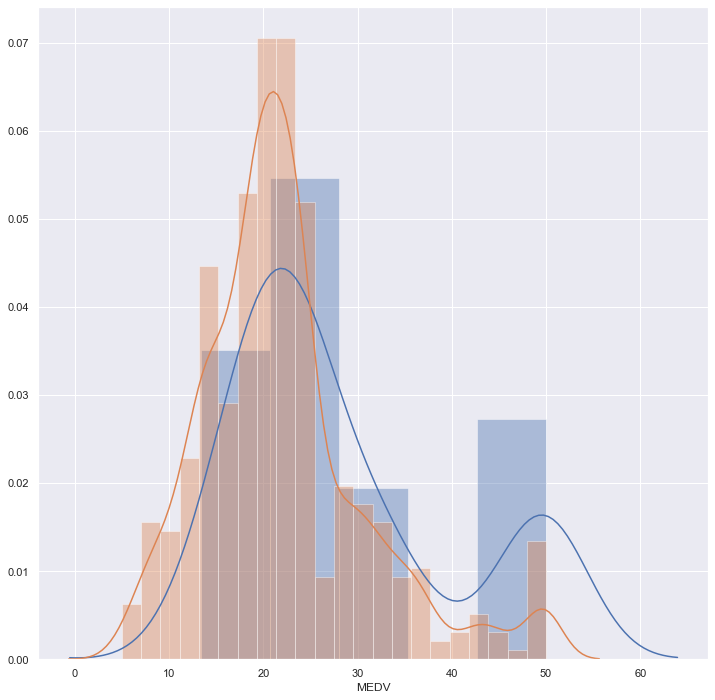

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
ax1 = sns.distplot(chas_list)
ax2 = sns.distplot(notChas_list)

From the above plot, it looks as though both sets of values are roughly following a normal distribution, however in both cases, there is a bump in the number of values at the upper end, which may suggest the data is skewed slightly.

We can proceed on the basis that the data is sufficiently normally distributed to allow testing on that basis.

#### T-testing
We will first look at the option for testing using a t-test. We have established that the data is sufficiently normal to allow for a valid t-test.

The sample sizes are also sufficiently large so as to allow results to be considered significant wrt the respective populations.

That said, the sample sizes are relatively small in the larger scheme of things, which is why we will use the t-test method to test our hypothesis.

I mentioned earlier that the sample sizes for both data sub-sets were quite different, however, the t-test is not impacted by sample size and so we will continue with our test using the data as it is.

In [24]:
ss.ttest_ind(chas_list, notChas_list)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#### Inference
So the p-value generated from this t-test is ~0.00007, which is miniscule. How do we interpret this?

In simple terms, the p-value tells us the probability that our hypothesis is accurate for the relevant populations, based on the samples used to carry out the test. Therefore a lower p-value means that there is a lower chance that our null hypothesis is true.

It is generally accepted that a p-value of 0.05 (or 5%) is the dividing line that tells us whether to accept or reject our hypothesis.

In our case, with p-value of ~0.00007, there is little doubt that we should reject our null hypothesis and accept the alternative.

So we are saying that based on our sample data, we **reject the hypothesis** that the average house price in areas bordering the Charles River **is the same as** the average house price in areas that do not border the Charles river.

#### ANOVA<br/>
**Reference:** https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-4.php

In [25]:
result = ss.f_oneway(chas_list, notChas_list)
result

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

In [26]:
result.pvalue

7.390623170520815e-05

We can see here that the ANOVA test gives us the same p-value of ~0.00007.
This agrees with our t-test result and we can be more confident now in our decision to reject our null hypothesis, having minimised the risk of seeing Type-I or Type-II errors in our decision-making

## Part 3: Machine Learning - Model to Predict MEDV

After some research, the following points of note have appeared consistently across a number of investigations on the boston dataset.

- a number of sources have identified the following variables as key to the calculation of MEDV
    - RM
    - LSTAT
    - PTRATIO

This seems to reinforce the findings in section 1 of this notebook, that these three variable are the ones with the strongest correlation to MEDV.

**References**
https://www.ritchieng.com/machine-learning-project-boston-home-prices/

<br/>
Let's remind ourselves again, with regression plots to visualise the correlations


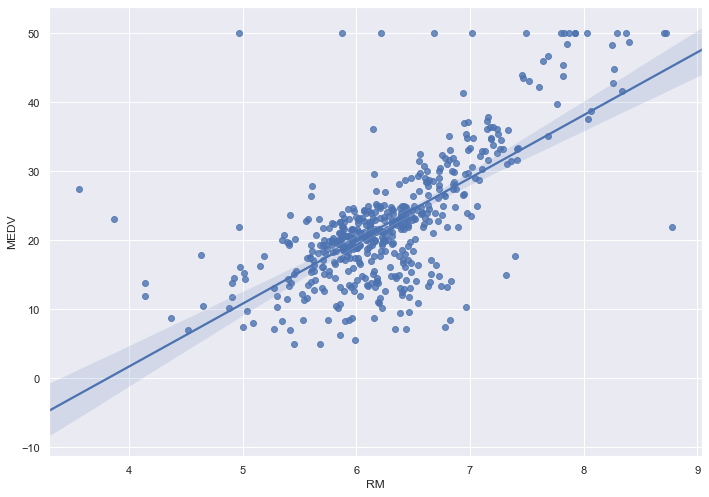

In [27]:
sns.regplot(x="RM", y="MEDV", data=df);

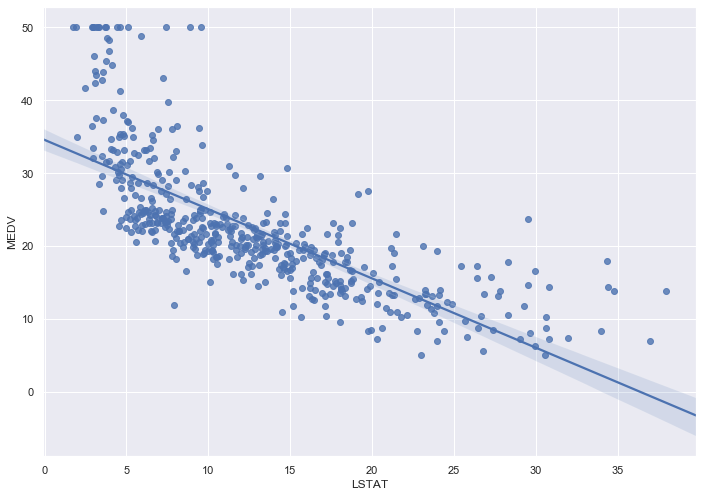

In [28]:
sns.regplot(x="LSTAT", y="MEDV", data=df);

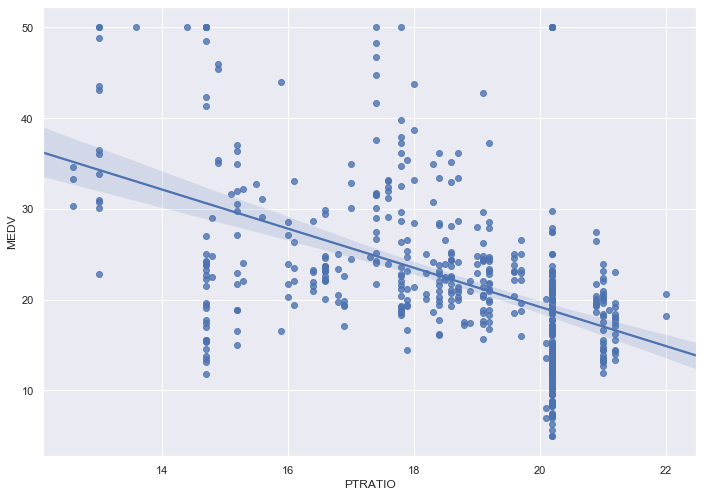

In [29]:
sns.regplot(x="PTRATIO", y="MEDV", data=df);

Based on our descriptive statistics discussion, we will use the strongest indicators for MEDV to build our neural network and prediction model.

### Preprocessing
***
#### Fitting and Transforming

In [31]:
# inputs = df[['RM', 'LSTAT', 'PTRATIO', 'CHAS']]
inputs = df[['RM', 'LSTAT', 'PTRATIO']]
output = df['MEDV']

In [32]:
x_train, x_test, y_train, y_test = mod.train_test_split(inputs, output, test_size = 0.2)

#### Initial Attempt
***
First, we will build a model using our three strongly correlated variable
No scaling or whitening is applied to the inputs<br>
The model will have an input and output layer only<br>
test varying neurons and input activations

In [46]:
# create a new neural network
m = kr.models.Sequential()

# input layer - 3 inputs, X neurons ... trial & error
m.add(kr.layers.Dense(256, input_dim=3, activation='relu'))

# output layer - single property value, so linear activation
m.add(kr.layers.Dense(1, activation='linear'))

# compile the model with mean_absolute_error loss function and adam optimizer
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
m.compile(loss ='mean_absolute_error', optimizer ='adam', metrics = ['acc'])

In [47]:
# train the model
hist_1 = m.fit(x_train, y_train, epochs = 50, batch_size=30, verbose=1)

Epoch 1/50
404/404 [==============================] - 0s 954us/step - loss: 17.8528 - acc: 0.0025
Epoch 2/50
404/404 [==============================] - 0s 43us/step - loss: 11.6818 - acc: 0.0000e+00
Epoch 3/50
404/404 [==============================] - 0s 40us/step - loss: 9.0626 - acc: 0.0000e+00
Epoch 4/50
404/404 [==============================] - 0s 44us/step - loss: 8.3545 - acc: 0.0025
Epoch 5/50
404/404 [==============================] - 0s 40us/step - loss: 7.3718 - acc: 0.0025
Epoch 6/50
404/404 [==============================] - 0s 42us/step - loss: 6.5230 - acc: 0.0025
Epoch 7/50
404/404 [==============================] - 0s 41us/step - loss: 6.0088 - acc: 0.0074
Epoch 8/50
404/404 [==============================] - 0s 43us/step - loss: 5.6472 - acc: 0.0074
Epoch 9/50
404/404 [==============================] - 0s 45us/step - loss: 5.3955 - acc: 0.0025
Epoch 10/50
404/404 [==============================] - 0s 48us/step - loss: 5.2229 - acc: 0.0074
Epoch 11/50
404/404 [=======

In [48]:
hist_1.history.keys()

dict_keys(['loss', 'acc'])

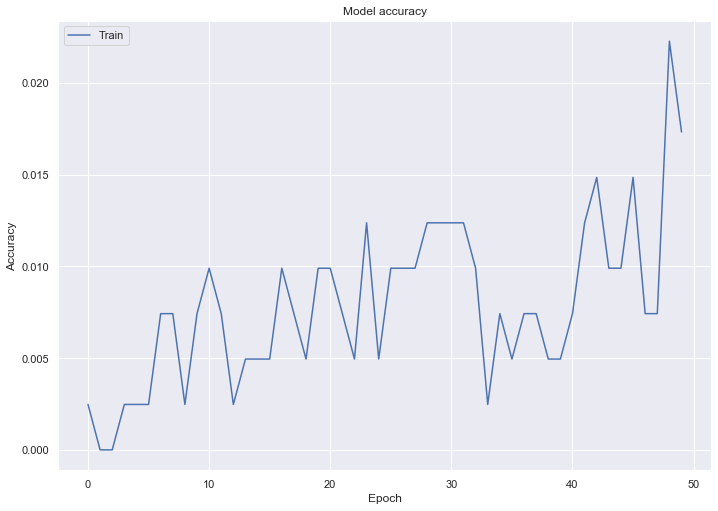

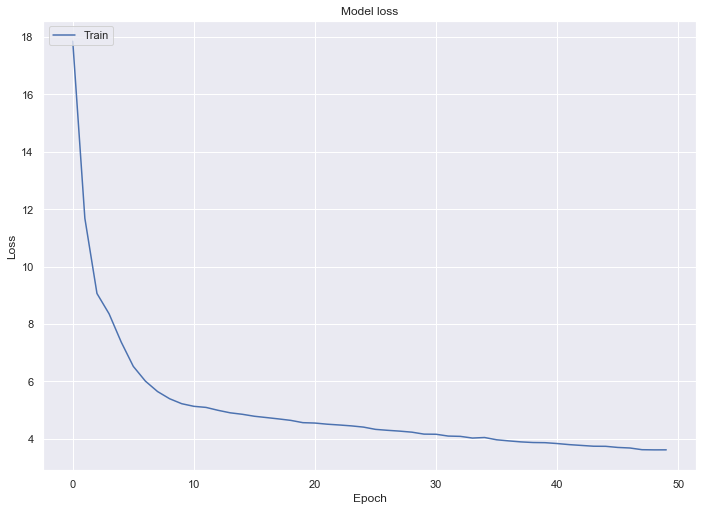

In [52]:
# plot fit params for first attempt

# Plot training & validation accuracy values
plt.plot(hist_1.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist_1.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
y_predicted = m.predict(x_test).round(1).T
y_predicted

array([[15.1, 26.5, 23.4, 16.4, 31. , 26. , 22. , 30.6, 12.8, 28.9, 26.3,
        14.3, 12.8, 21.2, 18.9, 17.2, 16.1, 16. , 31.1, 15.8, 15. , 40.3,
        21.7, 15.7, 27. , 23.1, 17.1, 29.7, 38.3, 18.9, 14.9, 15.5, 29.6,
        19.7, 11.5, 26. , 26.2, 10.2, 13.8, 18.9, 36.2, 20.8, 20.4, 32.5,
        28.3, 36.2, 24.3, 22.7, 20.9, 27.9, 18.3, 14.9, 17.6, 17.7, 22.8,
        14.9, 20. , 12.1, 17.3, 31.8, 17. , 12.7, 29.3, 12. , 13.1, 16. ,
        22.7, 15. , 21.8, 19.5, 30.1, 19.3, 15.7, 32.4, 25.5, 20.1, 19.2,
        23.6, 15.5, 23.4, 27.5, 13.9, 13.8, 17. , 16.6, 21.6, 16.1, 35.5,
        27.4, 14.6, 22.4, 16.5, 13.8, 13.1, 19.5, 19.9, 22. , 24.2, 21.4,
        14.7, 18.7, 17.8]], dtype=float32)

In [54]:
y_test.to_numpy()

array([20.5, 23.3, 20.4, 14.2, 41.3, 29.1, 24.4, 34.6, 13.8, 36.5, 30.1,
       15.1,  8.5, 21.7, 21.2, 17.5, 18.4, 19.6, 33.4, 20.1, 17.5, 41.7,
       23. , 12.1, 24.7, 21.1, 21.4, 29.1, 50. , 14.5, 18.8, 21.5, 27.9,
       19.3, 10.2, 26.7, 27.1,  8.8, 13.4, 22.5, 46. , 19.3, 21.2, 31.7,
       29.4, 48.5, 21.6, 18.6, 20. , 28.6, 10.9, 17.8, 20. , 13.8, 20.6,
       23.2, 20.1, 10.4, 16. , 37.9, 19.3,  5. , 28. ,  8.1, 11.8, 12.5,
       23. , 13.6, 20.9, 22.6, 24.8, 20. , 14.1, 28.5, 27.5, 22.6, 19.1,
       28.1, 15.6, 19.4, 33.8,  5.6, 19.1, 22. , 18.4, 21. , 18.3, 50. ,
       22.9, 13.1, 20.4, 15. ,  8.8, 13.3, 23.2, 24.3, 20.6, 22.4, 19. ,
       19.1, 16.2, 20.6])

In [55]:
m.evaluate(x_test, y_test)

102/102 [==============================] - 0s 708us/step


[3.1829961468191708, 0.009803921915590763]

predict loss value almost identical to trained loss value
However at almost 4.0, can probably do better.

comparing some values in the test and predicted y sets, most price values are a few thousand off.

#### Second Attempt - With Scaling<br/>
**Reference:** https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/<br/>
**Reference:** https://scikit-learn.org/stable/modules/preprocessing.html<br/>
**Reference:** https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html<br/>
**Reference:** https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [56]:
x_train, x_test, y_train, y_test = mod.train_test_split(inputs, output, test_size = 0.2)

In [57]:
# run each x-value through the neural network
# scaler = pre.MinMaxScaler()
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [60]:
# create a new neural network
m = kr.models.Sequential()

# input layer - 3 inputs, X neurons ... trial & error
m.add(kr.layers.Dense(256, input_dim=3, activation='relu'))

# output layer - single property value, so linear activation
m.add(kr.layers.Dense(1, activation='linear'))

# compile the model
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
m.compile(loss ='mean_absolute_error', optimizer ='adam', metrics = ['acc'])

In [61]:
# train the model
# inputs, outputs, no. of runs, and batch size per run
hist_2 = m.fit(x_train_scaled, y_train, epochs = 50, batch_size=50, verbose=1)

Epoch 1/50
404/404 [==============================] - 0s 926us/step - loss: 22.3540 - acc: 0.0000e+00
Epoch 2/50
404/404 [==============================] - 0s 31us/step - loss: 22.0240 - acc: 0.0000e+00
Epoch 3/50
404/404 [==============================] - 0s 34us/step - loss: 21.6820 - acc: 0.0000e+00
Epoch 4/50
404/404 [==============================] - 0s 35us/step - loss: 21.3213 - acc: 0.0000e+00
Epoch 5/50
404/404 [==============================] - 0s 33us/step - loss: 20.9246 - acc: 0.0000e+00
Epoch 6/50
404/404 [==============================] - 0s 36us/step - loss: 20.4871 - acc: 0.0000e+00
Epoch 7/50
404/404 [==============================] - 0s 27us/step - loss: 19.9994 - acc: 0.0000e+00
Epoch 8/50
404/404 [==============================] - 0s 31us/step - loss: 19.4669 - acc: 0.0025
Epoch 9/50
404/404 [==============================] - 0s 32us/step - loss: 18.8784 - acc: 0.0000e+00
Epoch 10/50
404/404 [==============================] - 0s 27us/step - loss: 18.2522 - acc: 0.0

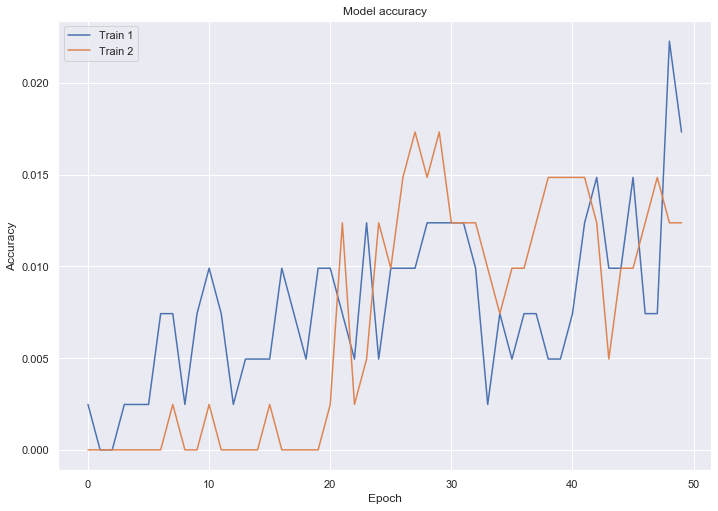

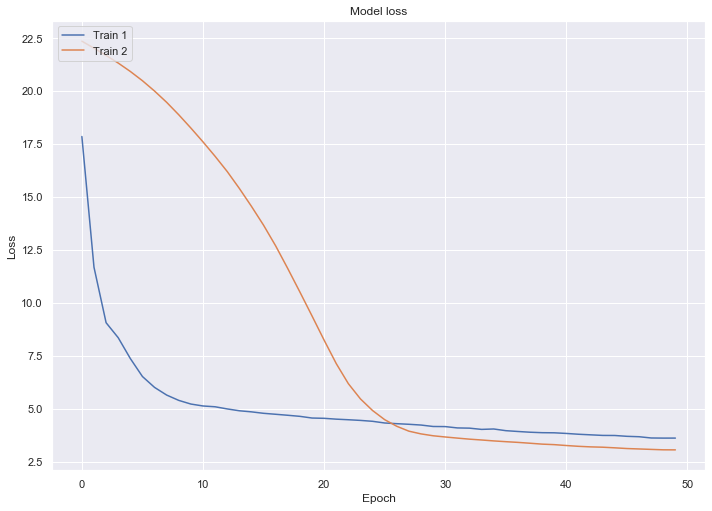

In [62]:
# Plot training & validation accuracy values
plt.plot(hist_1.history['acc'])
plt.plot(hist_2.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train 1', 'Train 2'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist_1.history['loss'])
plt.plot(hist_2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train 1', 'Train 2'], loc='upper left')
plt.show()

In [63]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[39., 24., 54., 14., 13., 20., 14., 15., 13., 18., 19., 22., 25.,
        20., 28., 30., 15., 25., 28., 32., 42., 27., 15., 23., 15., 12.,
        14., 17., 30., 18., 24., 24., 16., 29., 26., 16., 19., 14., 25.,
        12., 17., 23., 20., 16., 17., 21., 22., 18., 29., 21., 35., 23.,
        14., 20., 16., 13., 33., 16., 19., 16., 25., 33., 16., 22., 24.,
        25., 22., 20., 21., 16., 26., 24., 14., 17., 15., 22., 28., 25.,
        15., 26., 12., 18., 15., 29., 17., 14., 14., 32., 24., 26., 16.,
        18., 25., 17., 42., 16., 15., 21., 17., 18., 13., 14.]],
      dtype=float32)

In [64]:
y_test.as_matrix().astype(np.float32)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([34.6, 22.6, 50. , 17.8,  8.8, 18.9,  8.1, 14.4, 10.5, 21.7, 21.2,
       25. , 25. , 23. , 28. , 36.1, 10.2, 25.3, 27.9, 33.2, 50. , 32.5,
       19.5, 22.4, 18.4, 13.9, 15.4, 15. , 24. , 20.1, 26.4, 23.8, 15.6,
       30.8, 23.3, 18.7, 18.5, 12.7, 22.1, 15.7, 17.7, 21.4, 18.7, 17.9,
       16.4, 22.2, 20.6, 17.1, 26.6, 21. , 31.7, 18.2, 15.2, 20.3, 20.3,
       20. , 32.9, 23.1, 21.2, 16. , 23. , 35.4, 19.9, 22.2, 23.2, 23.8,
       22.7, 19.4, 50. , 20.6, 23.9, 22.9, 19. , 27.9, 15.1, 19.8, 24.5,
       22. ,  9.7, 29. , 17.8, 21.7, 15.4, 23.9, 16.1, 17.5, 14.1, 50. ,
       28.4, 22.9, 24.4, 18.9, 22.2, 19.5, 42.8, 14.3, 26.4, 19.1, 27.1,
       19.7, 20.5,  8.3], dtype=float32)

In [65]:
m.evaluate(x_test_scaled, y_test)

102/102 [==============================] - 0s 736us/step


[3.193282622917026, 0.03921568766236305]

Training gets our loss value down below 3.0 (2.99), but with predicted vs test loss value still above 3.44, our prediction model is still showing quite a large variance between prediction and test y values.
<br/>
Plots show a similar positive trend in accuracy, with a better loss outcome across a larger training session

#### Third Attempt - with Whitening<br/>
**Reference:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [75]:
inputs = df[['RM', 'LSTAT', 'PTRATIO']]
output = df['MEDV']

In [76]:
x_train, x_test, y_train, y_test = mod.train_test_split(inputs, output, test_size = 0.2)

In [77]:
# pca = dec.PCA(n_components=4, whiten=True) 
pca = dec.PCA(n_components=3, whiten=True) 
pca.fit(x_train)
pca.transform(x_train)

array([[-0.67052529, -0.40745983,  0.01071193],
       [-0.87550995, -1.00758237,  0.30029495],
       [ 0.0566229 , -0.57554696,  0.25282571],
       ...,
       [ 0.6227271 ,  0.59232569, -0.01547074],
       [ 0.39815597, -0.71079619, -0.2708055 ],
       [-1.4104433 ,  1.77886089, -1.60888672]])

In [78]:
# create a new neural network
m = kr.models.Sequential()

# input layer - 3 inputs, X neurons ... trial & error
m.add(kr.layers.Dense(256, input_dim=3, activation='relu'))

# output layer - single property value, so linear activation
m.add(kr.layers.Dense(1, activation='linear'))

# compile the model
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
m.compile(loss ='mean_absolute_error', optimizer ='adam', metrics = ['acc'])

In [79]:
# train the model
# inputs, outputs, no. of runs, and batch size per run
hist_3 = m.fit(x_train, y_train, epochs = 50, batch_size=50)

Epoch 1/50
404/404 [==============================] - 0s 930us/step - loss: 23.5069 - acc: 0.0000e+00
Epoch 2/50
404/404 [==============================] - 0s 28us/step - loss: 18.3480 - acc: 0.0025
Epoch 3/50
404/404 [==============================] - 0s 32us/step - loss: 13.7317 - acc: 0.0000e+00
Epoch 4/50
404/404 [==============================] - 0s 28us/step - loss: 10.7081 - acc: 0.0074
Epoch 5/50
404/404 [==============================] - 0s 28us/step - loss: 9.2757 - acc: 0.0025
Epoch 6/50
404/404 [==============================] - 0s 30us/step - loss: 8.7938 - acc: 0.0050
Epoch 7/50
404/404 [==============================] - 0s 27us/step - loss: 8.3608 - acc: 0.0099
Epoch 8/50
404/404 [==============================] - 0s 33us/step - loss: 7.8879 - acc: 0.0050
Epoch 9/50
404/404 [==============================] - 0s 31us/step - loss: 7.4539 - acc: 0.0074
Epoch 10/50
404/404 [==============================] - 0s 31us/step - loss: 6.9783 - acc: 0.0025
Epoch 11/50
404/404 [=====

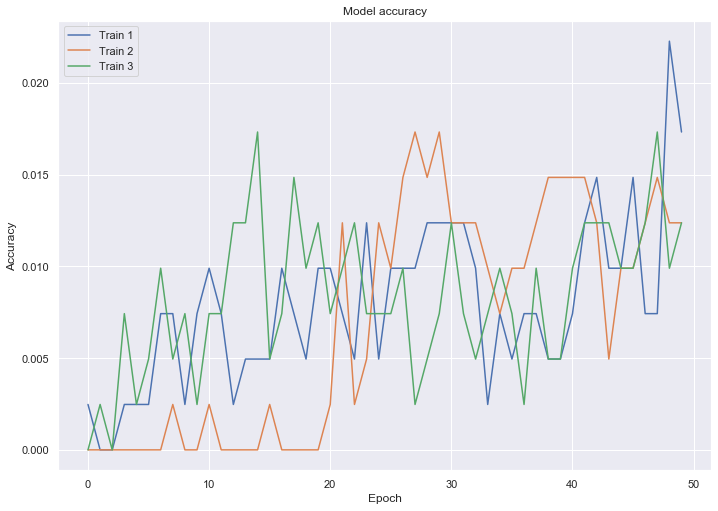

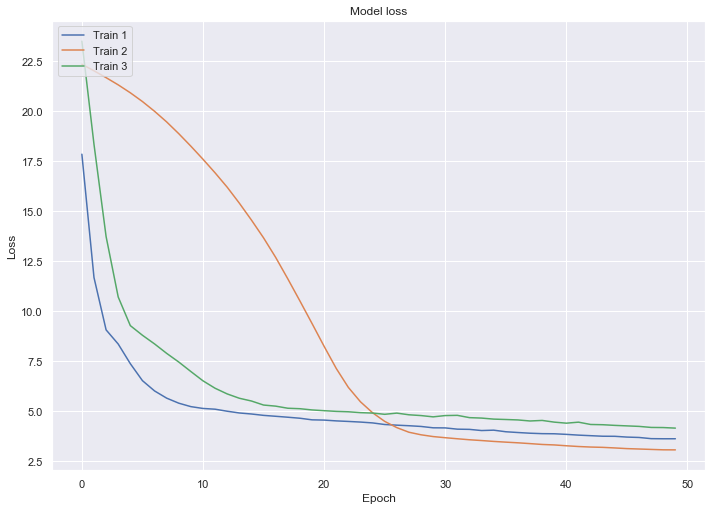

In [82]:
# Plot training & validation accuracy values
plt.plot(hist_1.history['acc'])
plt.plot(hist_2.history['acc'])
plt.plot(hist_3.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train 1', 'Train 2', 'Train 3'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist_1.history['loss'])
plt.plot(hist_2.history['loss'])
plt.plot(hist_3.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train 1', 'Train 2', 'Train 3'], loc='upper left')
plt.show()

In [83]:
# run each x-value through the neural network
pca.transform(x_test)
m.predict(x_test).round().T

array([[25., 18., 15., 16., 33., 28., 29., 20., 26., 33., 15., 14., 24.,
        29., 18., 17., 23., 22., 26., 26., 31., 32., 16., 18., 10., 26.,
        21., 17., 22., 23., 19., 22., 15., 25., 18., 27., 14., 15., 38.,
        14., 26., 22., 33., 18., 21., 14., 19., 19., 24., 14., 22., 13.,
        14., 14., 14., 29., 16., 21., 28., 21., 26., 13., 17., 16., 18.,
         9., 28., 20., 21., 34., 13., 19., 23., 20., 33., 20., 25., 33.,
        21., 17., 30., 20., 13., 16., 29., 23., 17., 27., 26., 21., 26.,
        33., 29.,  9.,  8., 31., 28., 10., 23., 30., 15.,  7.]],
      dtype=float32)

In [84]:
x_test.as_matrix().astype(np.float32)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 6.059,  8.51 , 20.2  ],
       [ 6.749, 17.44 , 20.2  ],
       [ 5.565, 17.16 , 20.2  ],
       [ 6.129, 15.12 , 14.7  ],
       [ 6.683,  3.73 , 20.2  ],
       [ 6.635,  5.99 , 17.   ],
       [ 6.781,  7.67 , 20.9  ],
       [ 5.981, 11.65 , 17.4  ],
       [ 6.593,  9.67 , 21.   ],
       [ 7.454,  3.11 , 15.9  ],
       [ 5.836, 18.66 , 20.9  ],
       [ 5.747, 19.92 , 20.2  ],
       [ 5.884,  7.79 , 18.3  ],
       [ 8.297,  7.44 , 13.   ],
       [ 6.114, 14.98 , 20.2  ],
       [ 5.713, 14.76 , 20.2  ],
       [ 6.182,  9.47 , 18.6  ],
       [ 5.966, 10.13 , 19.2  ],
       [ 6.618,  7.6  , 17.4  ],
       [ 7.088,  7.85 , 15.3  ],
       [ 7.412,  5.25 , 17.4  ],
       [ 7.691,  6.58 , 18.6  ],
       [ 6.142, 18.72 , 21.   ],
       [ 5.803, 14.64 , 20.2  ],
       [ 5.631, 29.93 , 15.2  ],
       [ 6.041,  7.7  , 19.6  ],
       [ 5.841, 11.41 , 19.2  ],
       [ 5.786, 14.15 , 17.9  ],
       [ 5.972,  9.97 , 18.4  ],
       [ 5.869,  9.8  , 20.2  ],
       [ 6

In [85]:
m.evaluate(x_test, y_test)

102/102 [==============================] - 0s 719us/step


[3.8238374392191568, 0.0]

Whitening the data seems to have given us worse results than the previous cases, so we will discount whitening as part of our preprocessing strategygives worse results in this case<br>
***

### Other Modifications
Let's try adding some hidden layers and looking at the whole dataset, all 13 variables again, to see if we can get any better results

In [96]:
# inputs = df[['RM', 'LSTAT', 'PTRATIO']]
inputs = df.drop(columns=['MEDV'])
output = df['MEDV']

In [97]:
x_train, x_test, y_train, y_test = mod.train_test_split(inputs, output, test_size = 0.2)

In [98]:
# create a new neural network
m = kr.models.Sequential()

# input layer - 13 inputs, X neurons ... trial & error
m.add(kr.layers.Dense(256, input_dim=13, activation='relu'))

# hidden layers ... best tested outcome
m.add(kr.layers.Dense(128, activation='relu'))
m.add(kr.layers.Dense(64, activation='relu'))

# output layer - single property value, so linear activation
m.add(kr.layers.Dense(1, activation='linear'))

# compile the model
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
m.compile(loss ='mean_absolute_error', optimizer ='adam', metrics = ['acc'])

In [99]:
# run each x-value through the neural network
# scaler = pre.MinMaxScaler()
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [100]:
# train the model
# inputs, outputs, no. of runs, and batch size per run
hist_4 = m.fit(x_train_scaled, y_train, epochs = 50, batch_size=20)

Epoch 1/50
404/404 [==============================] - 1s 2ms/step - loss: 20.2058 - acc: 0.0000e+00
Epoch 2/50
404/404 [==============================] - 0s 132us/step - loss: 9.2448 - acc: 0.0000e+00
Epoch 3/50
404/404 [==============================] - 0s 140us/step - loss: 4.5303 - acc: 0.0025
Epoch 4/50
404/404 [==============================] - 0s 135us/step - loss: 3.7060 - acc: 0.0000e+00
Epoch 5/50
404/404 [==============================] - 0s 147us/step - loss: 3.0542 - acc: 0.0099
Epoch 6/50
404/404 [==============================] - 0s 141us/step - loss: 2.8975 - acc: 0.0149
Epoch 7/50
404/404 [==============================] - 0s 140us/step - loss: 2.6824 - acc: 0.0124
Epoch 8/50
404/404 [==============================] - 0s 144us/step - loss: 2.6910 - acc: 0.0223
Epoch 9/50
404/404 [==============================] - 0s 140us/step - loss: 2.5764 - acc: 0.0322
Epoch 10/50
404/404 [==============================] - 0s 144us/step - loss: 2.4809 - acc: 0.0223
Epoch 11/50
404/40

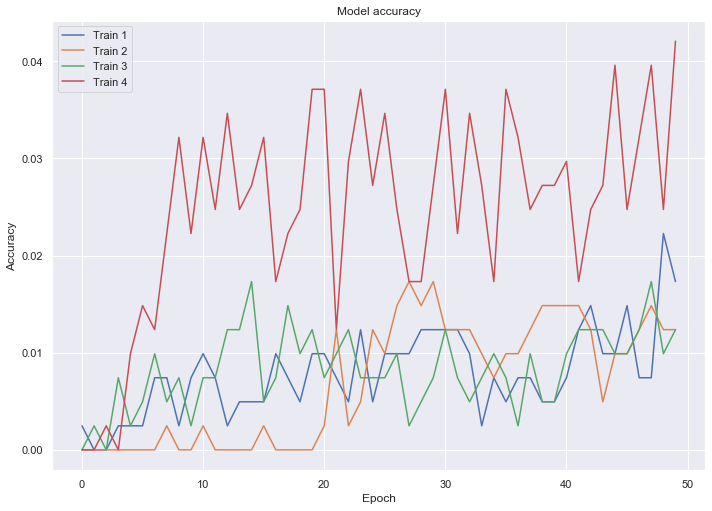

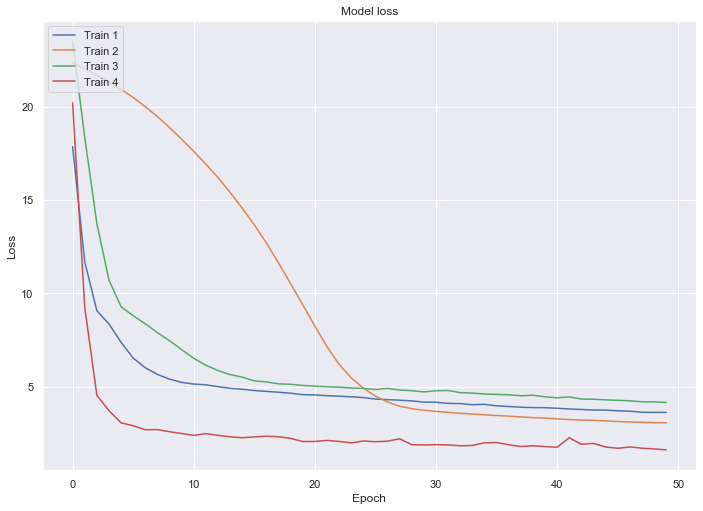

In [101]:
# Plot training & validation accuracy values
plt.plot(hist_1.history['acc'])
plt.plot(hist_2.history['acc'])
plt.plot(hist_3.history['acc'])
plt.plot(hist_4.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train 1', 'Train 2', 'Train 3', 'Train 4'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist_1.history['loss'])
plt.plot(hist_2.history['loss'])
plt.plot(hist_3.history['loss'])
plt.plot(hist_4.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train 1', 'Train 2', 'Train 3', 'Train 4'], loc='upper left')
plt.show()

After a number of test runs with various parameter changes, it seems that the above model is what will give the best loss value results for our predictons.
I have observed that the loss value continues to reduce as epochs are increased, however the best loss value achieved was 0.2940 at Epoch 982 of 1000.

In order to balance between time, computing resources and best outcome, as well as to avoid a risk of over-fitting the model, I have set up the training model for 50 epochs, similar to the other training attempts through the notebook.

In [102]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[23., 23., 47., 25., 23., 17., 17., 13., 17., 16., 13., 19., 22.,
        24., 24., 15., 23.,  8., 18., 15., 24., 24., 35., 24., 28., 15.,
        29., 14., 19., 15., 35., 18., 20., 20., 19., 30., 15., 21., 13.,
        21., 19., 21., 17., 21., 24., 14., 32., 22., 20., 20., 20., 25.,
        28., 23., 22., 11., 21., 29., 17., 11., 25., 19., 21., 13., 30.,
        22., 15., 25., 30., 42., 25., 21., 23., 18., 23., 19., 24., 37.,
        17., 22., 25., 27., 15., 24., 11., 34., 10., 14., 23., 19., 23.,
        29., 18., 21., 21., 22., 26., 33., 10., 22., 10., 24.]],
      dtype=float32)

In [103]:
y_test.as_matrix().astype(np.float32)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([25. , 23.9, 50. , 36.2, 23.1, 15. , 15.6, 14.1, 16.1, 18.4, 10.2,
       19.9, 21.8, 24.8, 22.1, 13.1, 23.1,  7.2, 18. , 14.1, 22.5, 20.8,
       34.9, 23.9, 29.1, 15.2, 31.6, 15.6, 17.1, 19.1, 31. , 21.4, 24.3,
       18.7, 19.6, 31.6, 16.6, 22.2,  8.5, 20.2, 19.9, 21.7, 13.8, 16.6,
       23.9, 14.8, 29. , 23.1, 21.7, 21.4, 19. , 24.4, 30.8, 21.7, 27.9,
       11.3, 26.4, 24.3, 17.6, 14.4, 22.8, 23.8, 23.1, 11.7, 28.2, 24.7,
       16.4, 23.8, 37. , 45.4, 26.4, 21.8, 25. , 18.7, 24.5, 19.9, 23.7,
       36. , 20. , 21.7, 22. , 25.1, 11.8, 22.8, 12.3, 35.4,  8.4, 14.9,
       29.6, 18.5, 22.9, 27.5, 19.9, 23.3, 15. , 21.4, 22. , 30.1, 13.4,
       21.7, 13.8, 28.7], dtype=float32)

In [104]:
m.evaluate(x_test_scaled, y_test)

102/102 [==============================] - 0s 938us/step


[2.055247479794072, 0.009803921915590763]